## Abstract


This study focuses into optimizing routing paths in wireless sensor networks (WSNs) that are set up to monitor environmental conditions. The aim is to find the best routing paths that reduces latency while maintaining high transmission rates and considering the limits of sensor’s communication range. To tackle this challenge, we tried out two algorithms—Dijkstra’s Algorithm and the Genetic Algorithm with the aim of observing the difference between deterministic algorithm and heuristic algorithm in a multi objective problems.
To implement Dijkstra Algorithm to solve the multi-objective problem, we decided to combine the two objectives into a single score using linear combination because this algorithm works well for single-objective problems. On the other hand, the Genetic Algorithm, which is inspired by the process of natural selection, and used to handle the multi-objective task. The genetic algorithm applies fitness functions to search for various routing paths and gives optimal solutions. For comparison with the dijkstra algorithm, we wrote two types of genetic algorithm, the first using the linear combination for single score and the second using the multiple objectives separately. The performance of both the algorithms were compared based on solution’s accuracy, speed, and scalability.    



## Problem Statement

Wireless sensor networks (WSNs) are set up across the New Forest to monitor environmental conditions such as temperature, humidity, and pressure. These sensors collect and transmit data to two base stations (Beaulieu and Lyndhurst). Due to the limited communication range of the sensors, many cannot connect directly to a base station and must relay information through nearby sensors. The challenge is to determine the optimal routing path for data packets from each sensor to a base station, balancing two objectives:
1. **Minimizing End-to-End Latency:** The total delay experienced by a data packet while travelling through all the links in the routing path, which is essential for the timely delivery of information.
2. **Maximizing End-to-End Transmission Rate:** The smallest data rate across all links in the routing path, where higher transmission rates lead to better data transfer efficiency.

**FORMULATION**

1. **Input Parameters:**
   - The dataset for this assignment includes a file containing the Node number, and coordinates (x and y) measured in meters.
   - Distance calculation formula:
<div style = "text-align: center;">
<img src="save/distance.jpg" alt="My Image" style="width: 600px;"/>
</div>
  
2. **Constraints:**
   - The transmission rate between two nodes depends on the distance between them, as detailed in the table below. d represents the distance calculated from the formula:

<div style = "text-align: center;">
<img src="table.png" alt="My Image" style="width: 600px;"/>
</div>

**NB:** Paths are invalid if any required link has a transmission rate of 0.

**Objective Function**

**Maximize Transmission Rate:** The end-to-end data transmission rate is defined as the minimum transmission rate of each link in the routing path.

$$ T = \min (T_1, T_2, T_3, \dots, T_n) $$

Where:
- \( T \) is the end-to-end transmission rate.
- \( T_1, T_2, T_3, \dots, T_n \) are the transmission rates of each link.

**Minimize Latency:** The end-to-end latency is the sum of all delays imposed by each link, with each link imposing a delay of 30 milliseconds (ms).

$$ L = N \times L_{\text{link}} $$

Where:
- \( L \) is the total end-to-end latency.
- \( N \) is the number of links.
- \( L_{\text{link}} \) is the delay imposed by each link, i.e., 30 ms.


## Methodology

To solve this problem we opted for two methods- Genetic Algorithm and Dijkstra Algorithm because both are useful tools that can work well together when tackling multi objective routing problems. GA is great at exploring complicated solution spaces and can optimize various conflicting aims like cost, distance, and reliability simultaneously. They generate a variety of solutions which helps decision-makers understand the different trade-offs. Moreover, GA can easily adapt by including different constraints and goals in its fitness functions, making it an excellent choice for real-world routing challenges. On the other hand, Dijkstra’s algorithm is a deterministic and reliable way to find the shortest path in weighted graphs. While it is traditionally focused on a single objective, its efficiency and ease of use make it perfect for situations where multiple objectives can be combined. Modified versions of Dijkstra's algorithm can also solve multiple objectives by optimizing trade-offs step by step, providing accurate solutions. By combining the optimization strengths of GA with the accuracy and speed of Dijkstra’s algorithm, we can create a strong hybrid method. This combination helps balance the exploration of different solutions with constraints, leading to adaptable and efficient solution for complex multi-objective routing problems.

To begin our implementation of all the algorithms we need to process our data into a graph format specific to our novel implementation

**Steps to creating the graph**

1. import all dependencies
2. read the data in csv format.
3. create the data points for the two base station in at Beaulieu and Lyndhurst.
4. create a function for the distance and another assign transimission rate.
5. iterate to all the valid points and create the graph.

Implementation steps can be seen below.
>


In [ ]:
#import dependencies
from random import choice
import random
import heapq
import pandas as pd
import numpy as np
import math
from deap import base, creator, tools, algorithms
from plot_utils import *
from collections import defaultdict, deque, Counter
import time

#read data
position_data = pd.read_csv("sub_data_file_with_header.csv")
#position_data.head()

# #add the base station to the dataframe if not added
# new_rows = pd.DataFrame({'Nos.': [len(position_data) + 1, len(position_data) + 2],
#                          'x': [5000, -5000],
#                          'y': [-5000, 5000]})
# position_data = pd.concat([position_data, new_rows], ignore_index=True)

#extract the index, x, y
i = position_data.loc[:, 'No.']
x = position_data.loc[:,'x']
y = position_data.loc[:,'y']

#define function for distance and transmission rate

def distance(x1, x2, y1, y2):
    return math.sqrt(((x2 - x1) ** 2) + ((y2 - y1) ** 2))

def transmission_rate(d):
    if d >= 3000:
        return 0
    elif d >= 2500 and d <3000:
        return 1
    elif d >= 2000 and d < 2500:
        return 2
    elif d>= 1500 and d < 2000:
        return 3
    elif d >= 1000 and d < 1500:
        return 4
    elif d >= 500 and d < 1000:
        return 5
    elif d >0 and d< 500:
        return 7
    else:
        return 0

#generate the graph using the predefined functions
graph = {}
for r,x_1,y_1 in zip(i,x,y):
    graph["Node_" + str(r)] = {}
    for j, x_2,y_2 in zip(i,x,y):
        #if statement to chech if x1,y1,x2,y2 are the same, and continue
        if (x_1 == x_2) and (y_1 == y_2):
            continue
        #call the distance function, returns transmission rate
        dist = distance(x_1, x_2, y_1, y_2)
        tr_rate = transmission_rate(dist)
        #check if the transmission is greater than zero
        if tr_rate > 0:
            graph["Node_" + str(r)]["Node_" + str(j)] = tr_rate


#Helper functions
#Helps get transmission rate in a path
def get_tran_rate(bp):
    rates = []
    for i in range(len(bp)-1):
        rates.append(graph[bp[i]][bp[i+1]])
    return min(rates)

#Helps get row number to make plots easier
def extract_point(bp):
    all_value = []
    for i in bp:
        all_value.append(int(i.split("_")[1]) -1)
    return all_value

**Dijkstra Algorithm (DA)**: An algorithm that calculates the shortest path between two nodes in a weighted graph. Its primary goal is to create a preferred technique for applications like planning the shortest route.

<div style = "text-align: center;">
<img src="dijkv_2.png" alt="My Image" style="width: 600px;"/>
</div>




### Steps of the Algorithm

This algorithm involves the following steps:

1. Start by setting the distance to the source vertex at **0** and every other vertex at **infinity**.
2. Pick the unvisited vertex that has the smallest distance from the source to be the **current vertex**.
3. For each unvisited neighbor of the current vertex, check the distance from the source. If this new distance is smaller, **update it**.
4. After checking all neighbors, **mark the current vertex as visited**.
5. Return to step 2 to select a new current vertex. **Repeat** this process until all vertices have been visited.
6. At the end, you will have the **shortest path** from the source vertex to the end.
hieved.

**Hyper parameters**

The hyperparameters for dijkstra algorithm are as follows:

1. Maximum transmission rate: The maximum transmission rate was deducted from the problem statement, so this variable is a constant variable.
2. Maximum latency: We counted the number of possible path from center to the two bases stations, which was 54. max_latency = 54 * 30 (1620)
3. Alpha: Hyper-parameter tunnig was used to get the optimal alpha.
4. Beta: Hyper-parameter tunning was used to determine the optimal Beta.

The Alpha and Beta were evaluated based on the mode of the best alpha beta combination for all the 150 data points in the data sets, the implementation can be seen in the ``evaluate_each_node`` function below. The tunning gave a strong preference to the transmission rate over the latency with a bias of nine ratio one.



In [ ]:
import heapq

# Constants
max_trans_rate = 7
max_latency = 1650
alpha = 0.3
beta = 0.7
# Updated cost_function
def dj_cost_function(rate, latency, alpha, beta):
    normalized_latency = latency / max_latency
    score = alpha * rate - beta * normalized_latency
    #print(f"dj_cost_function - Rate: {rate}, Latency: {latency}, Score: {score}")
    return score

In [ ]:
def dijkstra_with_tracking(start, target, alpha, beta):
    # Initialize tracking lists
    tracked_latency = []
    tracked_rate = []

    # Initialize Dijkstra's structures
    max_min_rate = {node: 0 for node in graph}
    max_min_rate[start] = max_trans_rate
    heap_start = [(-max_min_rate[start], start, [start])]
    best_path = []
    best_min_score = 0

    while heap_start:
        neg_rate, node, path = heapq.heappop(heap_start)
        rate = -neg_rate

        # Debug: Current processing state
        #print(f"Processing node: {node}, Rate: {rate}, Path: {path}")

        # Track the current path's latency and rate
        latency = (len(path) - 1) * 30 if len(path) > 1 else 0  # Current path latency
        tracked_latency.append(latency)
        tracked_rate.append(rate)

        if node in target:
            #print(f"Target node {node} reached. Current path: {path}, Rate: {rate}")
            if rate > best_min_score:
                #print(f"Updating best path to {path}")
                best_min_score = rate
                best_path = path
            continue

        for next_node, next_rate in graph[node].items():
            # Calculate latency and score
            new_latency = latency + 30
            next_opt_score = dj_cost_function(next_rate, new_latency, alpha, beta)
            update_rate = min(rate, next_opt_score)

            #print(f"Checking neighbor {next_node}. Rate: {next_rate}, New score: {next_opt_score}, Updated rate: {update_rate}")

            if update_rate > max_min_rate[next_node]:
                max_min_rate[next_node] = update_rate
                #print(f"Pushing to heap: {next_node}, Update rate: {update_rate}, Path: {path + [next_node]}")
                heapq.heappush(heap_start, (-update_rate, next_node, path + [next_node]))

                #print(f"Skipping neighbor {next_node}, Update rate: {update_rate}, Current max_min_rate: {max_min_rate[next_node]}")

    # Return the final best path, latency, rate, and tracking data
    if not best_path:
        print("No path found to target.")
        return [], float('inf'), 0, tracked_latency, tracked_rate
    else:
        final_latency = (len(best_path) - 1) * 30
        final_rate = get_tran_rate(best_path)
        #print(f"Best path found: {best_path}, Latency: {final_latency}, Rate: {final_rate}")
        return best_path, final_latency, final_rate, tracked_latency, tracked_rate


In [ ]:
# Evaluate each node separately to get the optimised alpha and beta and get the alpha beta with maximum occurence.
def evaluate_each_node(graph, nodes, base_stations):
    node_results = {}
    alpha_beta_pairs = []

    for node in nodes:
        best_alpha = 0
        best_beta = 0
        best_score = float('-inf')
        best_path = []

        for alpha in np.arange(0.1, 1.0, 0.1):
            for beta in np.arange(0.1, 1.0, 0.1):
                if round(alpha + beta, 1) != 1:  # Ensure alpha + beta = 1
                    continue

                paths_and_scores = []
                path, score, _,_,_ = dijkstra_with_tracking(node, target, alpha, beta)
                paths_and_scores.append((path, score))

                current_best_path, current_best_score = max(paths_and_scores, key=lambda x: x[1])

                if current_best_score > best_score:
                    best_score = current_best_score
                    best_alpha = alpha
                    best_beta = beta
                    best_path = current_best_path

        # Store the best alpha and beta for this node
        alpha_beta_pairs.append((best_alpha, best_beta))
        node_results[node] = {
            "best_alpha": best_alpha,
            "best_beta": best_beta,
            "best_path": best_path,
            "best_score": best_score,
        }

    # Determine the mode of alpha and beta pairs
    alpha_mode = Counter([pair[0] for pair in alpha_beta_pairs]).most_common(1)[0][0]
    beta_mode = Counter([pair[1] for pair in alpha_beta_pairs]).most_common(1)[0][0]

    # Normalize the mode values to ensure their sum equals 1
    total_mode = alpha_mode + beta_mode
    alpha_mode_normalized = alpha_mode / total_mode
    beta_mode_normalized = beta_mode / total_mode

    return node_results, alpha_mode_normalized, beta_mode_normalized


# Get all keys from the graph
keys_list = list(graph.keys())

# Remove 'Node_1' and 'Node_152' from the list if they exist
nodes = [key for key in keys_list if key not in ['Node_1', 'Node_152']]
target = ['Node_1', 'Node_152']

# Run the evaluation
results, alpha_mode, beta_mode = evaluate_each_node(graph, nodes, target)

# Display the results
print(f"Normalized alpha mode: {alpha_mode:.2f}")
print(f"Normalized beta mode: {beta_mode:.2f}\n")



Normalized alpha mode: 0.10
Normalized beta mode: 0.90




**Genetic Algorithm (GA)**: A genetic algorithm (GA) is a method used in computing to find solutions to problems by mimicking the process of natural evolution. This technique uses steps like initialization, selection, crossover, and mutation to evolve solutions toward the best outcome.

<div style = "text-align: center;">
<img src="ga_1.png" alt="My Image" style="width: 600px;"/>
</div>



This algorithm involves the following steps:

- **Initialization**: Create a random population of possible solutions.
- **Selection**: Evaluate each solution using the fitness function. The better solution has a higher chance of being chosen for creating the next generation.
- **Crossover**: Combine parts of two selected solutions to create a new solution that inherits desirable traits from both parent solutions.
- **Mutation**: Introduce new diversity, which helps to explore new possibilities that have not been previously considered.
- **Replacement**: Replace the old population with the new one and repeat the process until the best solution is found.
- **Termination**: Stop the process when an optimal solution is achieved.




#### Genetic Algorithm with single cost using linear combination

**Functions and their uses**

1. ``flatten_path``: This function is used to flatten a nested list (a list within a list) into a single, continuous list.

2. ``cost_function``: This function iterates through the list of paths, extracting rate data from the graph to calculate the rate of each path. It also computes the associated latency for the paths.

3. ``fitness``: This function combines the rate and latency values into a single score, typically to evaluate the overall performance or efficiency of a given path.

4. ``Parent``: This function generates valid paths from the start to the end point, considering a specified number of population members (likely related to genetic algorithms or similar population-based optimization methods).


In [ ]:
#Hyperparameters
#max_trans_rate = 7
#max_latency = 1

def flatten_path(path):
    """Flatten a nested path into a single flat list."""
    flat_path = []
    for node in path:
        if isinstance(node, list):
            flat_path.extend(flatten_path(node))  # Recursively flatten nested lists
        else:
            flat_path.append(node)
    return flat_path

def cost_function(path):
    """
    Return (rate, latency).
    rate  = min transmission rate of all edges along this path
    latency = sum of 30 ms per link (or whichever rule you need).
    """
    if not path:
        return (0, 999999)  # Or handle empty path

    path = flatten_path(path)
    edge_rates = []
    for i in range(len(path) - 1):
        src, dst = path[i], path[i+1]
        if src in graph and dst in graph[src]:
            edge_rates.append(graph[src][dst])
        else:
            # No direct link => zero or "invalid" rate
            return (0, 999999)

    # Objective A: Maximize 'rate' => We take the minimum of all edges
    rate = min(edge_rates) if edge_rates else 0
    # Objective B: Minimize 'latency' => 30 ms per hop
    latency = (len(path) - 1) * 30
    return (rate, latency)

def fitness(rate, latency, alpha = 0.5, beta = 0.5):
    normalized_latency = latency / max_latency
    return alpha * rate - beta * normalized_latency

def parent(start, end, population):

  total_population = []
  while len(total_population) < population:
      visited = set()
      path = [start]
      visited.add(start)
      # print('path visited before while loop', path)
      # print('visited before while loop', visited)

      while path[-1] not in end:
          # Get unvisited neighbors only
          unvisited_neighbors = [node for node in graph[path[-1]] if node not in visited]

          # Break if no unvisited neighbors are left
          if not unvisited_neighbors:
              #print("No unvisited neighbors available, breaking the loop.")
              break

          # Choose a random unvisited neighbor
          next_choice = choice(unvisited_neighbors)
          if next_choice in end:
              path.append(next_choice)
              break
          # print('choice', next_choice)

          path.append(next_choice)
          visited.add(next_choice)
          # print('path visited after while loop', path)
          # print('visited after while loop', visited)

      if path[-1] in end and path not in total_population:
          total_population.append(path)


  return total_population


In [ ]:

# Number of generations and population size
generations = 50
population = 20
start = "Node_5"
end = ["Node_1", "Node_152"]



# Main genetic algorithm
def genetic_algorithm_with_tracking(start, end, population, generations):
    # **Initialization**: Create a random initial population of possible solutions (paths)
    parent_population = parent(start, end, population)

    # Initialize tracking lists
    best_latency_per_gen = []
    best_rate_per_gen = []
    avg_latency_per_gen = []
    avg_rate_per_gen = []

    for generation in range(generations):
        # **Selection**: Evaluate each solution in the current population using the cost function
        costs = [cost_function(path) for path in parent_population]  # Compute cost (rate, latency) for each path
        fitness_scores = [fitness(cost[0], cost[1]) for cost in costs]  # Evaluate fitness based on the cost

        # Combine paths with their fitness scores and sort by fitness (higher is better)
        population_with_scores = list(zip(parent_population, fitness_scores))
        sorted_population = sorted(population_with_scores, key=lambda x: x[1], reverse=True)

        # Select the top 50% of the population as parents for the next generation
        parent_population = [item[0] for item in sorted_population]
        top_parent = parent_population[:len(parent_population) // 2]

        # Track metrics for this generation
        latencies = [cost[1] for cost in costs]
        rates = [cost[0] for cost in costs]
        best_latency_per_gen.append(min(latencies))  # Best latency in the generation
        best_rate_per_gen.append(max(rates))        # Best rate in the generation
        avg_latency_per_gen.append(sum(latencies) / len(latencies))  # Average latency
        avg_rate_per_gen.append(sum(rates) / len(rates))            # Average rate

        # **Crossover**: Create new offspring by combining parts of two parent solutions
        offspring = []
        while len(offspring) < population - len(top_parent):
            # Randomly select two parents for crossover
            parent1, parent2 = random.sample(top_parent, 2)

            # Find a common crossover point in both parents
            common_nodes = set(parent1) & set(parent2) - {start}
            if common_nodes:
                # Perform crossover at the common node
                crossover_point = random.choice(list(common_nodes))
                idx1, idx2 = parent1.index(crossover_point), parent2.index(crossover_point)

                # Create two offspring by combining parts of both parents
                offspring1 = parent1[:idx1] + parent2[idx2:]
                offspring2 = parent2[:idx2] + parent1[idx1:]

                # Ensure the offspring are not identical to their parents
                parent_box = [parent1, parent2]
                if offspring1 not in parent_box:
                    child = offspring1
                else:
                    child = offspring2

                # Add valid offspring that reach the end node to the new population
                if child[-1] in end:
                    offspring.append(child)

        # Mutation: Introduce diversity in the offspring
        mutation_rate = 0.2  # Mutation occurs with a 20% probability
        for child in offspring:
            if len(child) > 2 and random.random() < mutation_rate:
                # Mutate by replacing a segment of the path with a new segment
                mutation_point = random.randint(1, len(child) - 2)
                new_segment = parent(child[mutation_point], end, 1)[0]
                if new_segment:
                    child[mutation_point:] = new_segment[0:]

        # Combine parents and offspring to form the new population
        parent_population = top_parent + offspring

    # Termination: Stop when the final generation is reached and return the best solution
    # Find the best path and its corresponding rate in the final population
    costs = [cost_function(path) for path in parent_population]
    fitness_scores = [fitness(cost[0], cost[1]) for cost in costs]
    best_index = fitness_scores.index(max(fitness_scores))  # Index of the best solution
    best_path = parent_population[best_index]  # Best path found
    best_rate, best_latency = cost_function(best_path)  # Best rate corresponding to the path

    return best_path, best_latency, best_rate, best_latency_per_gen, best_rate_per_gen, avg_latency_per_gen, avg_rate_per_gen


# # Run the genetic algorithm
best_path, best_latency, best_rate, _,_,_,_ = genetic_algorithm_with_tracking(start, end, population, generations)

# # Output the results
# print("Best Path:", best_path)  # Display the best path found
# print("Best Rate:", best_rate)  # Display the corresponding rate
# print("Best Rate:", best_latency)

Best Path: ['Node_5', 'Node_79', 'Node_78', 'Node_1']
Best Rate: 2
Best Rate: 90


#### Genetic Algorithm using Pareto


**High-Level Overview**

1. ``Hyperparameters``: These control the rate of transmission (max_trans_rate), population size, mutation/crossover rates, etc.
2. ``Pareto Helpers``: These include the functions to compare costs based on the Pareto principle, which helps in determining "optimal" solutions that maximize the rate and minimize latency.

**Key Steps in the Algorithm**

1. ``Initialize Population``: Create an initial population of random paths.
2. ``Evaluate Costs``: For each path, calculate its cost (rate, latency).
3. ``Pareto Sorting``: Sort paths into non-dominated fronts.
4. ``Selection``: Select individuals from the Pareto fronts for the next generation.
5. ``Crossover``: Combine paths from the selected individuals to produce offspring.
6. ``Mutation``: Randomly alter offspring to introduce variation.
7. ``Repeat``: Continue this process for the specified number of generations.
8. ``Return Best Solution``: After all generations, return the path(s) from the first Pareto front, which represent the optimal trade-off between rate and latency.

In [ ]:
import random
from random import choice

# Hyperparameters
max_trans_rate = 7

# --------------
# Pareto Helpers
# --------------
def dominates(cost_a, cost_b):
    """
    cost_a = (rate_a, lat_a)
    cost_b = (rate_b, lat_b)
    We want to MAXIMIZE 'rate' and MINIMIZE 'latency'.
    cost_a dominates cost_b if:
      rate_a >= rate_b AND latency_a <= latency_b
      and they are not exactly the same in both.
    """
    rate_a, lat_a = cost_a
    rate_b, lat_b = cost_b

    return (
        (rate_a >= rate_b) and
        (lat_a <= lat_b) and
        (cost_a != cost_b)
    )

def non_dominated_sort(costs):
    """
    costs is a list of (rate, latency) pairs for each individual.
    Returns a list of 'fronts', where each front is a list of indices
    into costs. front[0] is the set of indices for the first (best) front,
    front[1] is the second, etc.
    """
    population_size = len(costs)

    # For each solution, store:
    #   S[i] = set of solutions that i dominates
    #   n[i] = how many solutions dominate i
    S = [set() for _ in range(population_size)]
    n = [0] * population_size

    for i in range(population_size):
        for j in range(population_size):
            if i == j:
                continue
            if dominates(costs[i], costs[j]):
                # i dominates j
                S[i].add(j)
            elif dominates(costs[j], costs[i]):
                # j dominates i
                n[i] += 1

    # Now iteratively build the fronts
    fronts = [[]]
    # first front: all i with n[i] == 0
    fronts[0] = [i for i in range(population_size) if n[i] == 0]

    f = 0
    # Go through each front
    while True:
        Q = []
        # For each solution p in front f
        for p in fronts[f]:
            # For each solution q dominated by p
            for q in S[p]:
                n[q] -= 1
                if n[q] == 0:
                    Q.append(q)
        if not Q:
            break
        # Next front
        fronts.append(Q)
        f += 1

    return fronts

# --------------------------------------
# Example function to build initial paths
# --------------------------------------
def build_population(start, end_nodes, population_size):
    """
    Creates 'population_size' random paths from start to any node in 'end_nodes'
    """
    total_population = []
    while len(total_population) < population_size:
        visited = set()
        path = [start]
        visited.add(start)

        while path[-1] not in end_nodes:
            curr = path[-1]
            unvisited_neighbors = [node for node in graph.get(curr, []) if node not in visited]
            if not unvisited_neighbors:
                break
            next_choice = choice(unvisited_neighbors)
            path.append(next_choice)
            visited.add(next_choice)

        if path[-1] in end_nodes and path not in total_population:
            total_population.append(path)

    return total_population

# --------------------------------
# Main Genetic Algorithm w/ Pareto
# --------------------------------
def genetic_algorithm_pareto_with_tracking(
    start,
    end_nodes,
    population_size=20,
    generations=50,
    crossover_rate=0.8,
    mutation_rate=0.2
):
    # Initialize: random population
    parent_population = build_population(start, end_nodes, population_size)

    # Initialize tracking lists
    best_latency_per_gen = []
    best_rate_per_gen = []
    avg_latency_per_gen = []
    avg_rate_per_gen = []

    for gen in range(generations):
        # Evaluate each path => compute cost = (rate, latency)
        costs = [cost_function(path) for path in parent_population]

        # Track metrics for this generation
        latencies = [cost[1] for cost in costs]
        rates = [cost[0] for cost in costs]
        best_latency_per_gen.append(min(latencies))  # Best latency
        best_rate_per_gen.append(max(rates))        # Best rate
        avg_latency_per_gen.append(sum(latencies) / len(latencies))  # Average latency
        avg_rate_per_gen.append(sum(rates) / len(rates))            # Average rate

        # Non-dominated sort => get list of fronts
        fronts = non_dominated_sort(costs)

        # Selection: pick from front 0, then front 1, etc. until population_size is reached
        new_population = []
        for front in fronts:
            if len(new_population) + len(front) <= population_size:
                new_population.extend([parent_population[i] for i in front])
            else:
                # Take subset if needed
                needed = population_size - len(new_population)
                selected_indices = random.sample(front, needed)
                new_population.extend([parent_population[i] for i in selected_indices])
            if len(new_population) >= population_size:
                break

        parent_population = new_population

        # Crossover
        offspring = []
        while len(offspring) < population_size * crossover_rate:
            parent1, parent2 = random.sample(parent_population, 2)
            common_nodes = set(parent1) & set(parent2) - {start}
            if common_nodes:
                crossover_node = random.choice(list(common_nodes))
                idx1 = parent1.index(crossover_node)
                idx2 = parent2.index(crossover_node)
                child1 = parent1[:idx1] + parent2[idx2:]
                child2 = parent2[:idx2] + parent1[idx1:]
                for child in (child1, child2):
                    if child[-1] in end_nodes:
                        offspring.append(child)

        # Mutation
        for child in offspring:
            if random.random() < mutation_rate and len(child) > 2:
                mutation_point = random.randint(1, len(child) - 2)
                subpath = build_population(child[mutation_point], end_nodes, 1)[0]
                child[mutation_point:] = subpath

        # Combine parents + offspring
        parent_population.extend(offspring)
        if len(parent_population) > population_size:
            costs = [cost_function(path) for path in parent_population]
            fronts = non_dominated_sort(costs)
            reduced_pop = []
            for front in fronts:
                if len(reduced_pop) + len(front) <= population_size:
                    reduced_pop.extend([parent_population[i] for i in front])
                else:
                    needed = population_size - len(reduced_pop)
                    selected_indices = random.sample(front, needed)
                    reduced_pop.extend([parent_population[i] for i in selected_indices])
                if len(reduced_pop) >= population_size:
                    break
            parent_population = reduced_pop

    # At the end, compute the final fronts again
    final_costs = [cost_function(path) for path in parent_population]
    final_fronts = non_dominated_sort(final_costs)

    # The “best” solutions (first front) are all Pareto-optimal
    best_front_indices = final_fronts[0]
    best_solutions = [parent_population[i] for i in best_front_indices]
    best_solutions_costs = [final_costs[i] for i in best_front_indices]

    return (
        best_solutions[0],
        best_solutions_costs[0][1],  # Best latency
        best_solutions_costs[0][0],  # Best rate
        best_latency_per_gen,
        best_rate_per_gen,
        avg_latency_per_gen,
        avg_rate_per_gen
    )


# -----------------
# Run the algorithm
# -----------------

# start_node = "Node_6"
# end_nodes  = ["Node_1", "Node_152"]  # Example end nodes
# population_size = 20
# generations = 50

# pareto_solutions, latency, rate = genetic_algorithm_pareto(
#     start_node,
#     end_nodes,
#     population_size,
#     generations
# )



## Analysis of models

The aim is to get the average rate, cumulative latency, and the cumulative time it takes to run all the nodes to the endpoints.
This aim at getting the overall performance of all the models and compare it with eachother.

In [ ]:
results = []
end_node = ["Node_1", "Node_152"]
population = 20
generations=50

for node in range(2, 152):  # Nodes from Node_1 to Node_150
    node_name = f"Node_{node}"

    # Dijkstra
    start_time = time.time()
    dijkstra_path, dijkstra_latency, dijkstra_rate,_,_ = dijkstra_with_tracking(node_name, end_node, 0.1, 0.9)
    dijkstra_time = time.time() - start_time

    # Linear GA
    start_time = time.time()
    linear_path, linear_latency, linear_rate,_,_,_,_ = genetic_algorithm_with_tracking(node_name, end_node, population, generations)
    linear_time = time.time() - start_time

    # Multi-objective GA
    start_time = time.time()
    multi_path, multi_latency, multi_rate,_,_,_,_ = genetic_algorithm_pareto_with_tracking(node_name, end_node, population_size = population, generations = generations)
    multi_time = time.time() - start_time

    # Append results
    results.append({
        "Node": node_name,
        "Dijkstra": {"Path": dijkstra_path, "Latency": dijkstra_latency, "Rate": dijkstra_rate, "Time": dijkstra_time},
        "Linear_GA": {"Path": linear_path, "Latency": linear_latency, "Rate": linear_rate, "Time": linear_time},
        "Multi_GA": {"Path": multi_path, "Latency": multi_latency, "Rate": multi_rate, "Time": multi_time}
    })

# Example access
#print(results[0])  # Results for Node_1


In [ ]:
dijkstra_cum_latency = sum([result["Dijkstra"]["Latency"] for result in results])
dijkstra_cum_rate = sum([result["Dijkstra"]["Rate"] for result in results])
dijkstra_cum_time = sum([result["Dijkstra"]["Time"] for result in results])

linear_cum_latency = sum([result["Linear_GA"]["Latency"] for result in results])
linear_cum_rate = sum([result["Linear_GA"]["Rate"] for result in results])
linear_cum_time = sum([result["Linear_GA"]["Time"] for result in results])

multi_cum_latency = sum([result["Multi_GA"]["Latency"] for result in results])
multi_cum_rate = sum([result["Multi_GA"]["Rate"] for result in results])
multi_cum_time = sum([result["Multi_GA"]["Time"] for result in results])

# Aggregate results
cumulative_results = {
    "Dijkstra": {"Total Latency": dijkstra_cum_latency, "Avg Rate": dijkstra_cum_rate, "Total Time": dijkstra_cum_time},
    "Linear_GA": {"Total Latency": linear_cum_latency, "Avg Rate": linear_cum_rate, "Total Time": linear_cum_time},
    "Multi_GA": {"Total Latency": multi_cum_latency, "Avg Rate": multi_cum_rate, "Total Time": multi_cum_time}
}

print(cumulative_results)


{'Dijkstra': {'Total Latency': 37470, 'Avg Rate': 696, 'Total Time': 1.2094950675964355}, 'Linear_GA': {'Total Latency': 22530, 'Avg Rate': 259, 'Total Time': 4.824214696884155}, 'Multi_GA': {'Total Latency': 17670, 'Avg Rate': 233, 'Total Time': 11.273062705993652}}


## Visualization

The aim is to visualize major evaluation factors, like the total latency, average rate, and total time execution.

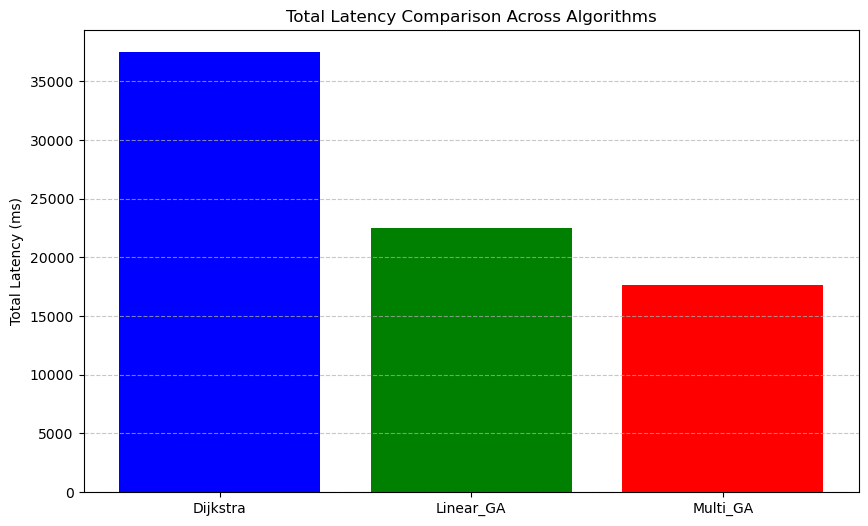

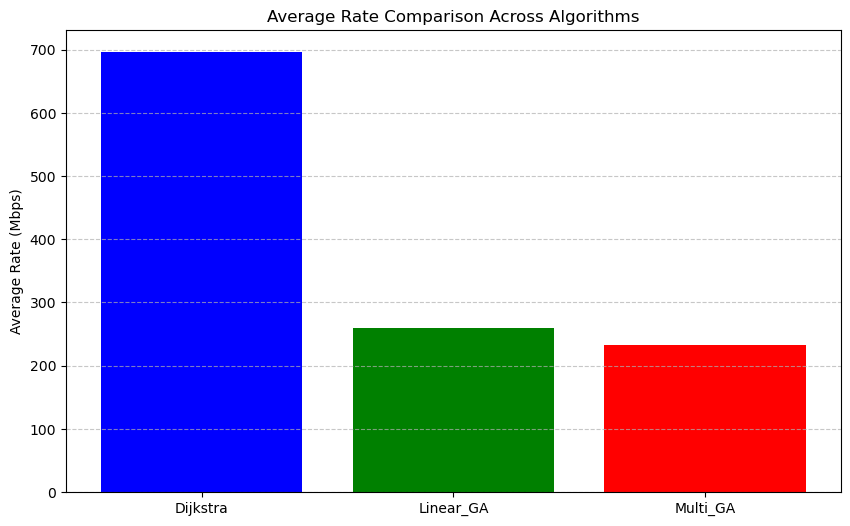

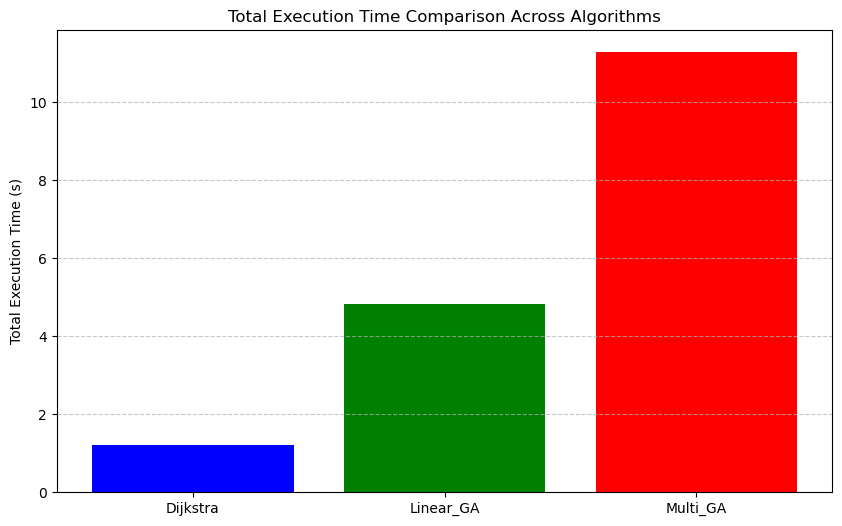

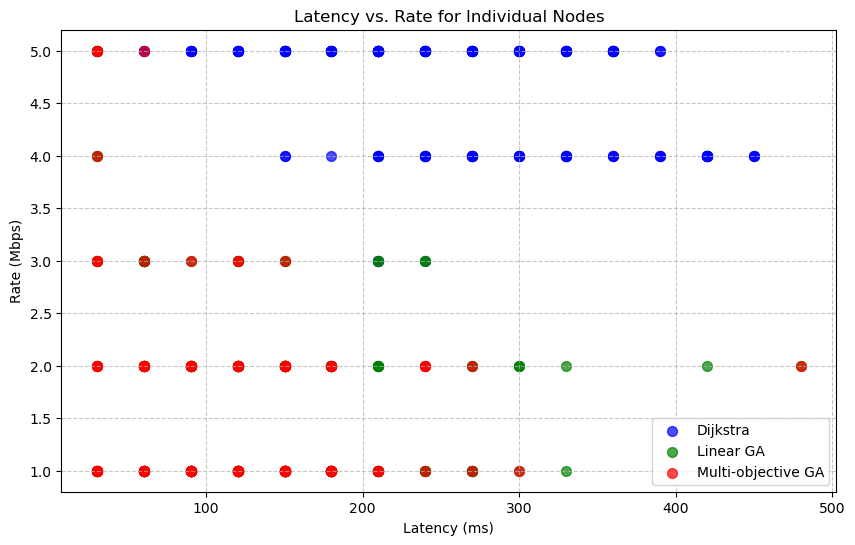

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extracting data for visualization
algorithms = list(cumulative_results.keys())
total_latencies = [cumulative_results[algo]["Total Latency"] for algo in algorithms]
avg_rates = [cumulative_results[algo]["Avg Rate"] for algo in algorithms]
total_times = [cumulative_results[algo]["Total Time"] for algo in algorithms]

# Bar chart for Total Latency comparison
plt.figure(figsize=(10, 6))
plt.bar(algorithms, total_latencies, color=["blue", "green", "red"])
plt.ylabel("Total Latency (ms)")
plt.title("Total Latency Comparison Across Algorithms")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar chart for Average Rate comparison
plt.figure(figsize=(10, 6))
plt.bar(algorithms, avg_rates, color=["blue", "green", "red"])
plt.ylabel("Average Rate (Mbps)")
plt.title("Average Rate Comparison Across Algorithms")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bar chart for Total Time comparison
plt.figure(figsize=(10, 6))
plt.bar(algorithms, total_times, color=["blue", "green", "red"])
plt.ylabel("Total Execution Time (s)")
plt.title("Total Execution Time Comparison Across Algorithms")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Scatter plot for Individual Node Latency vs. Rate (replace these with actual values)
# Extract actual latency and rate values from the results
dijkstra_latency = [result["Dijkstra"]["Latency"] for result in results]
dijkstra_rate = [result["Dijkstra"]["Rate"] for result in results]

linear_ga_latency = [result["Linear_GA"]["Latency"] for result in results]
linear_ga_rate = [result["Linear_GA"]["Rate"] for result in results]

multi_ga_latency = [result["Multi_GA"]["Latency"] for result in results]
multi_ga_rate = [result["Multi_GA"]["Rate"] for result in results]

plt.figure(figsize=(10, 6))
plt.scatter(dijkstra_latency, dijkstra_rate, label="Dijkstra", color="blue", s=50, alpha=0.7)
plt.scatter(linear_ga_latency, linear_ga_rate, label="Linear GA", color="green", s=50, alpha=0.7)
plt.scatter(multi_ga_latency, multi_ga_rate, label="Multi-objective GA", color="red", s=50, alpha=0.7)
plt.xlabel("Latency (ms)")
plt.ylabel("Rate (Mbps)")
plt.title("Latency vs. Rate for Individual Nodes")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Evaluation of Results

The evaluation below are based on the graphs plotted above.

**Transmission Rate**:

The first chart comparing average transmission rates shows that Dijkstra's algorithm achieves the highest transmission rate (around 700 Mbps), while Linear GA and Multi-objective GA achieve lower average rates (about 200 Mbps). This highlights Dijkstra’s strong performance in maximizing rate, as it focuses on single-objective optimal paths.
The latency-rate scatterplot also demonstrates that Dijkstra consistently achieves higher transmission rates for individual nodes, indicating robustness in maximizing bandwidth. However, this comes at the expense of latency.

**Latency**:

The chart comparing total latency indicates that Dijkstra incurs the highest latency (above 35,000 ms), making it less effective for time-critical applications. Both Linear GA and Pareto GA significantly reduce latency, with Pareto GA achieving the lowest overall latency (about 15,000 ms), emphasizing its balance between objectives.
The latency convergence plot validates that both Linear and Pareto GAs converge to a much lower latency compared to Dijkstra. Pareto GA achieves better average latency, as seen in its rapid drop and stability across generations.

**Computation Time**:

The chart comparing execution times highlights that Dijkstra is computationally the fastest (1 second), followed by Linear GA (4 seconds). Pareto GA incurs the highest computational cost (~10 seconds), as expected for a multi-objective optimization approach.
The higher execution time of Pareto GA reflects its iterative nature and focus on exploring trade-offs. While costly, this may be justifiable.

**Latency vs Rate**:
The Dijkstra Algorithm consistently performs with higher rates across all latencies but subsequently having higher latencies, suggesting stable but less optimized performance based on our given objectives; the Linear Genetic Algorithm exhibits moderate rates that slightly improve with increased latency objective and displays varied latency, indicating a more aggressive optimization compared to Dijkstra; whereas the Multi-objective GA clearly outperforms in terms of rate, achieving higher rates at lower latencies and maintaining high rates even at higher latencies, demonstrating effective optimization for both rate and latency.


## Validation

The code below collects convergence data for latency and transmission rates across multiple nodes for our three different algorithms which are Dijkstra, Linear Genetic Algorithm (GA), and Multi-objective GA. Each node, ranging from Node_2 to Node_151, is processed to run these algorithms, capturing both best and average performance metrics for latency and rate. The results are aggregated and plotted over generations to analyze and visualize the performance trends of each algorithm in terms of latency and rate convergence across all nodes.

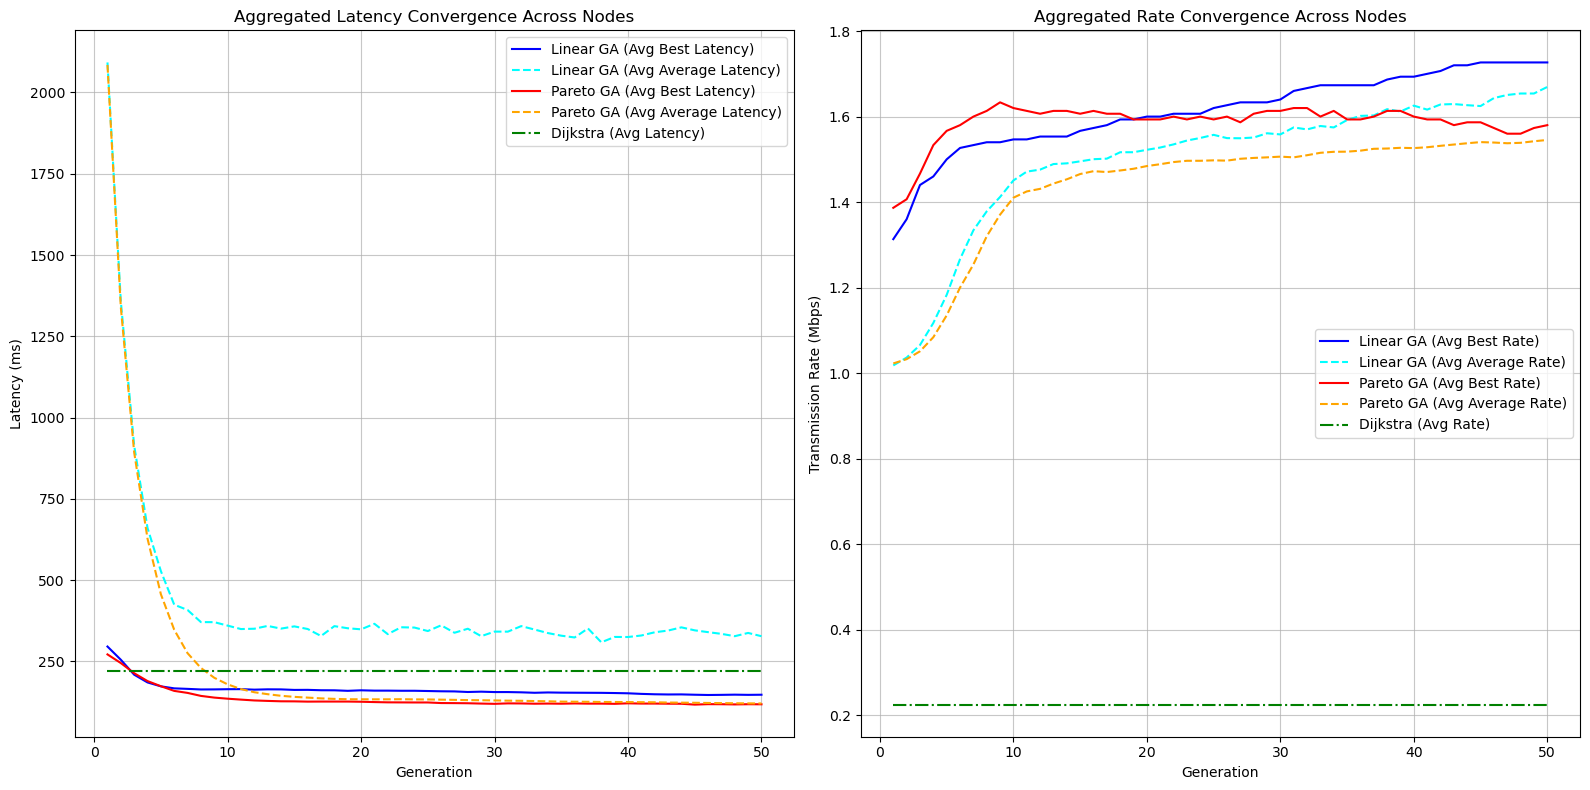

In [ ]:
# Initialize tracking variables for Linear GA
linear_best_latency_per_gen = []
linear_best_rate_per_gen = []
linear_avg_latency_per_gen = []
linear_avg_rate_per_gen = []

# Initialize tracking variables for Multi-objective GA
pareto_best_latency_per_gen = []
pareto_best_rate_per_gen = []
pareto_avg_latency_per_gen = []
pareto_avg_rate_per_gen = []

# Initialize tracking variables for Dijkstra
dijkstra_latency_per_node = []
dijkstra_rate_per_node = []

# Loop through nodes and collect convergence data for all algorithms
for node in range(2, 152):  # Nodes from Node_2 to Node_151
    node_name = f"Node_{node}"
    #print(f"Processing {node_name}...")

    # Run Linear GA for this node
    _, _, _, lin_best_latency, lin_best_rate, lin_avg_latency, lin_avg_rate = genetic_algorithm_with_tracking(
        start=node_name,
        end=["Node_1", "Node_152"],
        population=20,
        generations=50
    )
    linear_best_latency_per_gen.append(lin_best_latency)
    linear_best_rate_per_gen.append(lin_best_rate)
    linear_avg_latency_per_gen.append(lin_avg_latency)
    linear_avg_rate_per_gen.append(lin_avg_rate)

    # Run Multi-objective GA for this node
    _, _, _, pareto_best_latency, pareto_best_rate, pareto_avg_latency, pareto_avg_rate = genetic_algorithm_pareto_with_tracking(
        start=node_name,
        end_nodes=["Node_1", "Node_152"],
        population_size=20,
        generations=50
    )
    pareto_best_latency_per_gen.append(pareto_best_latency)
    pareto_best_rate_per_gen.append(pareto_best_rate)
    pareto_avg_latency_per_gen.append(pareto_avg_latency)
    pareto_avg_rate_per_gen.append(pareto_avg_rate)

    # Run Dijkstra's algorithm for this node
    _, _, _, dijkstra_tracked_latency, dijkstra_tracked_rate = dijkstra_with_tracking(
        start=node_name,
        target=["Node_1", "Node_152"],
        alpha=0.1,
        beta=0.9
    )
    # Since Dijkstra doesn't have generations, append its data as-is
    dijkstra_latency_per_node.append(dijkstra_tracked_latency)
    dijkstra_rate_per_node.append(dijkstra_tracked_rate)

# Aggregate results across all nodes for Linear GA
linear_aggregated_best_latency = [sum(gen) / len(gen) for gen in zip(*linear_best_latency_per_gen)]
linear_aggregated_best_rate = [sum(gen) / len(gen) for gen in zip(*linear_best_rate_per_gen)]
linear_aggregated_avg_latency = [sum(gen) / len(gen) for gen in zip(*linear_avg_latency_per_gen)]
linear_aggregated_avg_rate = [sum(gen) / len(gen) for gen in zip(*linear_avg_rate_per_gen)]

# Aggregate results across all nodes for Multi-objective GA
pareto_aggregated_best_latency = [sum(gen) / len(gen) for gen in zip(*pareto_best_latency_per_gen)]
pareto_aggregated_best_rate = [sum(gen) / len(gen) for gen in zip(*pareto_best_rate_per_gen)]
pareto_aggregated_avg_latency = [sum(gen) / len(gen) for gen in zip(*pareto_avg_latency_per_gen)]
pareto_aggregated_avg_rate = [sum(gen) / len(gen) for gen in zip(*pareto_avg_rate_per_gen)]

# Aggregate results across all nodes for Dijkstra
# Average across all nodes since Dijkstra doesn't have generations
dijkstra_final_avg_latency = sum([sum(lat) / len(lat) for lat in dijkstra_latency_per_node]) / len(dijkstra_latency_per_node)
dijkstra_final_avg_rate = sum([sum(rate) / len(rate) for rate in dijkstra_rate_per_node]) / len(dijkstra_rate_per_node)

# Repeat the average values for 50 generations to align with the genetic algorithms
dijkstra_avg_latency = [dijkstra_final_avg_latency] * 50
dijkstra_avg_rate = [dijkstra_final_avg_rate] * 50


# Plotting the aggregated convergence results
import matplotlib.pyplot as plt

generations = list(range(1, 51))

plt.figure(figsize=(16, 8))

# Latency Convergence
plt.subplot(1, 2, 1)
plt.plot(generations, linear_aggregated_best_latency, label="Linear GA (Avg Best Latency)", color="blue")
plt.plot(generations, linear_aggregated_avg_latency, label="Linear GA (Avg Average Latency)", color="cyan", linestyle="--")
plt.plot(generations, pareto_aggregated_best_latency, label="Pareto GA (Avg Best Latency)", color="red")
plt.plot(generations, pareto_aggregated_avg_latency, label="Pareto GA (Avg Average Latency)", color="orange", linestyle="--")
plt.plot(generations, dijkstra_avg_latency, label="Dijkstra (Avg Latency)", color="green", linestyle="-.")
plt.xlabel("Generation")
plt.ylabel("Latency (ms)")
plt.title("Aggregated Latency Convergence Across Nodes")
plt.legend()
plt.grid(alpha=0.7)

# Rate Convergence
plt.subplot(1, 2, 2)
plt.plot(generations, linear_aggregated_best_rate, label="Linear GA (Avg Best Rate)", color="blue")
plt.plot(generations, linear_aggregated_avg_rate, label="Linear GA (Avg Average Rate)", color="cyan", linestyle="--")
plt.plot(generations, pareto_aggregated_best_rate, label="Pareto GA (Avg Best Rate)", color="red")
plt.plot(generations, pareto_aggregated_avg_rate, label="Pareto GA (Avg Average Rate)", color="orange", linestyle="--")
plt.plot(generations, dijkstra_avg_rate, label="Dijkstra (Avg Rate)", color="green", linestyle="-.")
plt.xlabel("Generation")
plt.ylabel("Transmission Rate (Mbps)")
plt.title("Aggregated Rate Convergence Across Nodes")
plt.legend()
plt.grid(alpha=0.7)

plt.tight_layout()
plt.show()



## Validation of the convergence

1. Latency Convergence:
   The graph above shows how each algorithm minimizes latency over generations. Both Genetic Algorithms (GAs) show a clear downward trend in latency, especially during the early generations. Linear GA converges faster on average best latency, while Pareto GA exhibits slower convergence but balances average latency better. Dijkstra’s algorithm has the flattest curve since it’s deterministic and doesn’t improve iteratively.

2. Transmission Rate Convergence:
   The right-hand graph illustrates how the algorithms optimize transmission rates. Pareto GA seems to achieve a more consistent balance across rates, while Linear GA prioritizes maximizing rates. Dijkstra appears to perform worst in terms of transmission rates, likely due to its inability to optimize beyond initial path selection.

## Conclusion

The Linear GA excels at quickly maximizing transmission rates or minimizing latency but struggles with multi-objective optimization; the Pareto GA offers the most versatility with strong performance in both latency convergence and transmission rates, ideal for multi-objective routing scenarios; while Dijkstra provides consistent outcomes, it lags behind genetic algorithms in adaptive and iterative optimizations, making it best suited for static routing with fixed constraints.


<h2>Future Improvements</h2>
<ol>
    <li><strong>Improving the Algorithm:</strong>
        <ul>
            <li>We could mix the genetic algorithm with other smart methods like particle swarm optimization or simulated annealing. This might give better results overall.</li>
            <li>Adding some flexibility to the mutation and crossover rates in the genetic algorithm could help it adjust automatically during the process, making it more effective.</li>
            <li>For finding the shortest paths, trying other algorithms like A* or Bellman-Ford might work better than Dijkstra in some cases.</li>
        </ul>
    </li>
    <li><strong>Making it Faster and Scalable:</strong>
        <ul>
            <li>To handle bigger problems, we could use parallel computing or even GPUs to speed up the genetic algorithm.</li>
            <li>Breaking the problem into smaller parts using clustering techniques could make it easier and faster to solve.</li>
        </ul>
    </li>
    <li><strong>Handling Multiple Objectives:</strong>
        <ul>
            <li>Analyzing trade-offs between objectives (like cost vs time) using Pareto fronts could help us understand the results better.</li>
            <li>Trying other advanced multi-objective algorithms like NSGA-II or MOEA/D might give better and more diverse solutions.</li>
        </ul>
    </li>
    <li><strong>Real-World Constraints:</strong>
        <ul>
            <li>Adding practical constraints like vehicle capacities, delivery time limits, or live traffic data would make the solution more realistic.</li>
            <li>If we can use real-time updates (like traffic reports), the algorithm could adjust on the go.</li>
        </ul>
    </li>
    <li><strong>Testing and Validation:</strong>
        <ul>
            <li>It would be great to test our method on different problems or even real-world scenarios to make sure it works in general.</li>
            <li>Comparing our results with other popular methods could show where we’re doing well and what needs improvement.</li>
        </ul>
    </li>
    <li><strong>Making It More User-Friendly:</strong>
        <ul>
            <li>Better ways to visualize the routes and show performance metrics would make the results easier to understand.</li>
            <li>Creating an interface or tool (like a small app) could make it easy for others to use our solution.</li>
        </ul>
    </li>
</ol>


#### Routing path plot

The aim is to visually compare the path of the nodes for just one node to any of the base stations for the three models.

In [ ]:
#code to save the result
import os
import json


def get_all_rate(bp):
    rates = []
    for i in range(len(bp)-1):
        rates.append(graph[bp[i]][bp[i+1]])
    return rates

# Function to save all results for a model to a single JSON file
def save_all_results_to_json(folder_name, file_name, results):
    """
    Save all results for a model into a single JSON file in a specified folder.
    """
    os.makedirs(folder_name, exist_ok=True)  # Create folder if it doesn't exist
    file_path = os.path.join(folder_name, file_name)
    try:
        with open(file_path, "w") as outfile:
            json.dump(results, outfile, indent=2)
        print(f"All results saved to {file_path}")
    except Exception as e:
        print(f"Error saving results to {file_path}: {e}")

# Define base folder for results
RESULTS_BASE_FOLDER = "Results"

# Initialize lists to collect results for each model
linear_results = []
pareto_results = []
dijkstra_results = []

# Loop through nodes and generate results for each model
for node in range(2, 152):  # Nodes from Node_2 to Node_151
    node_name = f"Node_{node}"

    # Run Linear GA for this node
    linear_path, linear_latency, linear_rate,_,_,_,_ = genetic_algorithm_with_tracking(
        start=node_name,
        end=["Node_1", "Node_152"],
        population=20,
        generations=50
    )
    linear_rates = get_all_rate(linear_path)
    linear_results.append({
        "Source Node": node_name,
        "Routing Path": ', '.join(f"({i}, {r} Mbps)" for i, r in zip(linear_path[1:], linear_rates)),
        "End-to-end data rate": f"{min(linear_rates)} Mbps"
    })

    # Run Multi-objective GA for this node
    multi_path, multi_latency, multi_rate,_,_,_,_ = genetic_algorithm_pareto_with_tracking(
        start=node_name,
        end_nodes=["Node_1", "Node_152"],
        population_size=20,
        generations=50
    )
    multi_rates = get_all_rate(multi_path)
    pareto_results.append({
        "Source Node": node_name,
        "Routing Path": ', '.join(f"({i}, {r} Mbps)" for i, r in zip(multi_path[1:], multi_rates)),
        "End-to-end data rate": f"{min(multi_rates)} Mbps"
    })

    # Run Dijkstra's algorithm for this node
    dijkstra_path, dijkstra_latency, dijkstra_rate,_,_ = dijkstra_with_tracking(
        start=node_name,
        target=["Node_1", "Node_152"],
        alpha=0.1,
        beta=0.9
    )
    dijkstra_rates = get_all_rate(dijkstra_path)
    dijkstra_results.append({
        "Source Node": node_name,
        "Routing Path": ', '.join(f"({i}, {r} Mbps)" for i, r in zip(dijkstra_path[1:], dijkstra_rates)),
        "End-to-end data rate": f"{min(dijkstra_rates)} Mbps"
    })

# Save all results for each model to a single JSON file
save_all_results_to_json(f"{RESULTS_BASE_FOLDER}/LinearGA", "linear_results.json", linear_results)
save_all_results_to_json(f"{RESULTS_BASE_FOLDER}/ParetoGA", "pareto_results.json", pareto_results)
save_all_results_to_json(f"{RESULTS_BASE_FOLDER}/Dijkstra", "dijkstra_results.json", dijkstra_results)


All results saved to Results/LinearGA\linear_results.json
All results saved to Results/ParetoGA\pareto_results.json
All results saved to Results/Dijkstra\dijkstra_results.json


In [ ]:
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

node_name = "Node_2"

linear_path, linear_latency, linear_rate,_,_,_,_ = genetic_algorithm_with_tracking(
        start=node_name,
        end=["Node_1", "Node_152"],
        population=20,
        generations=50
    )

multi_path, multi_latency, multi_rate,_,_,_,_ = genetic_algorithm_pareto_with_tracking(
        start=node_name,
        end_nodes=["Node_1", "Node_152"],
        population_size=20,
        generations=50
    )

dijkstra_path, dijkstra_latency, dijkstra_rate,_,_ = dijkstra_with_tracking(
        start=node_name,
        target=["Node_1", "Node_152"],
        alpha=0.1,
        beta=0.9
    )

In [ ]:
from plot_utils import *

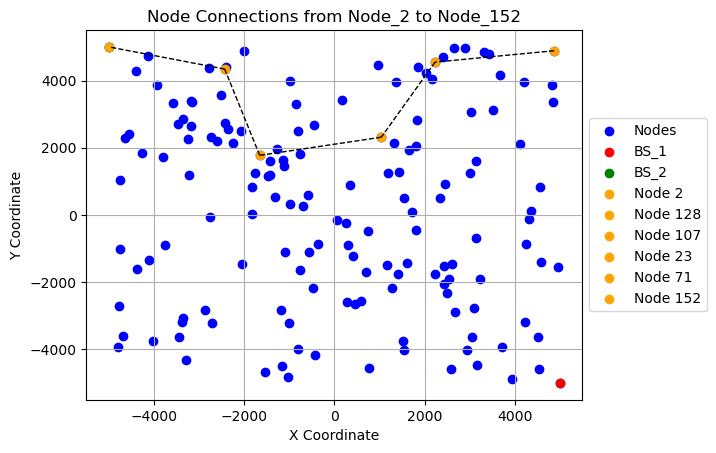

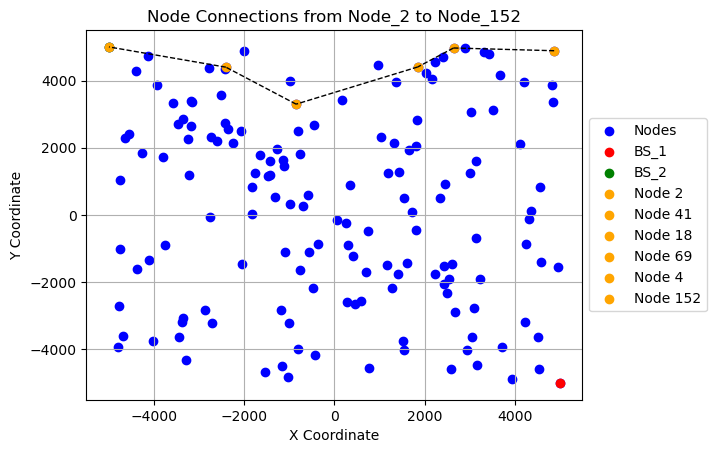

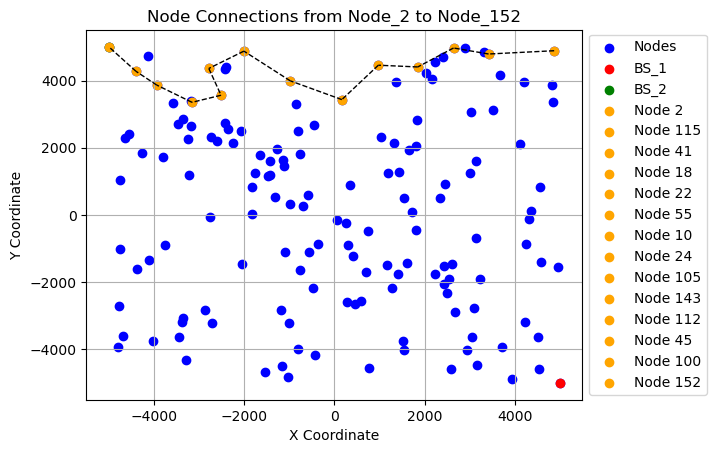

In [ ]:
result_paths = [linear_path, multi_path, dijkstra_path]
result_titles = ['linear_path', 'multi_path', 'dijkstra_path']

for i, best_path in enumerate(result_paths):
    # Create an instance of the Plot class
    plot_instance = Plot(best_path)

    # Call the plot_path method
    plot_instance.plot_path(coordinate_x, coordinate_y, best_path)

In [ ]:
coordinate_x = position_data.x.copy()
coordinate_y = position_data.y.copy()

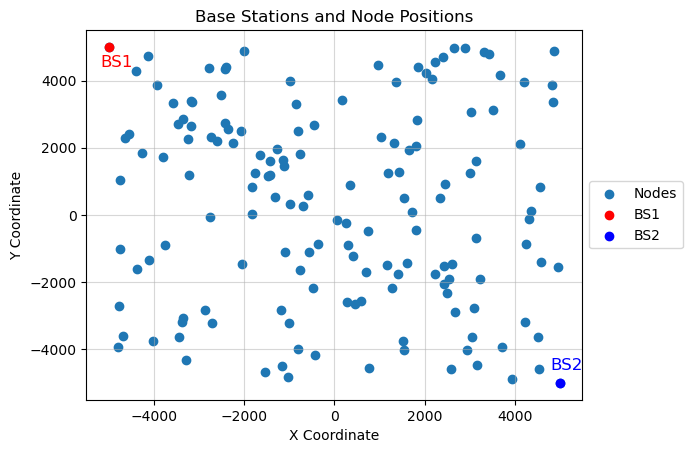

In [ ]:
import matplotlib.pyplot as plt

# Coordinates for BS1 and BS2
BS_1_x = -5000
BS_1_y = 5000
BS_2_x = 5000
BS_2_y = -5000

# Plot scatter points
plt.scatter(coordinate_x, coordinate_y, label="Nodes")

# Plot BS1 and BS2
plt.scatter(BS_1_x, BS_1_y, color='red', label="BS1")
plt.scatter(BS_2_x, BS_2_y, color='blue', label="BS2")

# Add labels for BS1 and BS2
plt.text(BS_1_x - 200, BS_1_y - 600, "BS1", color='red', fontsize=12)
plt.text(BS_2_x - 200, BS_2_y + 400, "BS2", color='blue', fontsize=12)

# Add legend and show plot
plt.legend()
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Base Stations and Node Positions")
plt.grid(alpha=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
